In [1]:
import os
import shap
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import xgboost as xgb
import catboost as cb
from scipy import stats
from sklearn.neural_network import MLPClassifier
from sklearn import tree, svm
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeClassifier, Lasso
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, LeaveOneOut 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import time
import division_into_classes as dic

In [2]:
cognitive_indicator = 'corsi'
indicator_folder = "D:/unn/down_syndrome_epigenetic/{0}".format(cognitive_indicator)
alpha = 0.001

correlation_frame = pd.read_csv(r"D:\unn\down_syndrome_epigenetic\{0}\correlation_frame.txt".format(cognitive_indicator), sep = '\t', index_col = 0)
methylation_frame = pd.read_csv(r"D:\unn\down_syndrome_epigenetic\{0}\methylation_frame.txt".format(cognitive_indicator), sep = '\t', index_col = 0)
cognitive_frame = pd.read_csv(r"D:\unn\down_syndrome_epigenetic\{0}\cognitive_frame.txt".format(cognitive_indicator), sep = '\t', index_col = 0)

In [3]:
classes_all_members, classes_unique_members = dic.division_into_classes (cognitive_indicator, cognitive_frame)
print('Division into classes \nall values:', *classes_all_members, '\nunique values:', *classes_unique_members)
division_method = int(input('\nChoose how to divide into classes:\n1. all values\n2. unique values\n3. manual division\n'))
if division_method == 3:
    print(sorted(list(cognitive_frame[cognitive_indicator])))
    lim1, lim2 = [int(i) for i in input('Enter boundary values: ').split(' ')]
    indicator_classes = dic.division_into_classes(cognitive_indicator, cognitive_frame, division_method, lim1, lim2)
else:
    indicator_classes = dic.division_into_classes(cognitive_indicator, cognitive_frame, division_method)

Division into classes 
all values: 14 8 6 
unique values: 9 13 6

Choose how to divide into classes:
1. all values
2. unique values
3. manual division
1


In [5]:
def LeaveOneOut_control (X, y, model):
    cv = LeaveOneOut()
    pred_targets = np.array([])
    act_targets = np.array([])
    
    for train_ix, test_ix in cv.split(X):
        Xm_train, Xm_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
        ym_train, ym_test = y.iloc[train_ix], y.iloc[test_ix]

        model.fit(Xm_train, ym_train)
        pred_labels = model.predict(Xm_test)
        pred_targets = np.append(pred_targets, pred_labels)
        act_targets = np.append(act_targets, ym_test)

    acc_m = accuracy_score(act_targets, pred_targets)
    f1_m = f1_score(act_targets, pred_targets, average = 'macro')
    return acc_m, f1_m
    
def hyperparameter_optimization (model, params, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 111, stratify = y)
    pipeline = Pipeline([('standard_scaler', StandardScaler()), ('model', model)])

    grid_cv = GridSearchCV(pipeline, params, cv = 5, n_jobs = -1, scoring = 'accuracy')
    grid_cv.fit(X_train, y_train)
    acc, f1 = LeaveOneOut_control(X, y, grid_cv)
    return acc, f1

1) LDA

In [6]:
X = methylation_frame[correlation_frame.index]
y = indicator_classes['class']

lda_model = LDA(solver = 'svd')
params = {'model__n_components': range(1, 4)}
acc, f1 = hyperparameter_optimization(lda_model, params, X, y)
print('LDA:', '\nacc =', acc, 'F1 =', f1)


5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py", line 576, in fit
    raise ValueError(
ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

One or more of the test scores are non-finite: [0.64 0.64  nan]

5 fits failed out of a total of 15.


5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py", line 576, in fit
    raise ValueError(
ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

One or more of the test scores are non-finite: [0.56 0.56  nan]

5 fits failed out of a total of 15.


5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py", line 576, in fit
    raise ValueError(
ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

One or more of the test scores are non-finite: [0.52 0.52  nan]

5 fits failed out of a total of 15.

LDA: 
acc = 0.6071428571428571 F1 = 0.48055555555555557



5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py", line 576, in fit
    raise ValueError(
ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

One or more of the test scores are non-finite: [0.56 0.56  nan]


2) Models 

In [9]:
X = methylation_frame[correlation_frame.index]
y = indicator_classes['class']

t1 = time.time()
dtree_model = tree.DecisionTreeClassifier(random_state = 111)
params = {'model__max_depth': range (1, 5)}
acc, f1 = hyperparameter_optimization(dtree_model, params, X, y)
print('Decision Tree:', 'acc =', acc, 'F1 =', f1)

rf_model = RandomForestClassifier(random_state = 111)
params = {'model__n_estimators': range (10, 110, 10),
          'model__max_depth': range (1, 5)}
acc, f1 = hyperparameter_optimization(rf_model, params, X, y)
print('Random Forest:', 'acc =', acc, 'F1 =', f1)

xg_model = xgb.XGBClassifier(objective ='multi:softprob', verbose_eval = False, random_state = 111)
params = {'model__max_depth': [2, 3, 4], 
          'model__n_estimators': range(10, 110, 10), 
          'model__learning_rate': [0.01, 0.05, 0.1],
          'model__colsample_bytree': [0.3, 0.5, 1.0],
          'model__gamma': [0.1, 0.5, 1, 1.5],
          'model__learning_rate': [0.001, 0.01],
          'model__min_child_weight': [1, 5, 10],
          'model__subsample': [0.6, 0.8, 1.0]}
acc, f1 = hyperparameter_optimization(xg_model, params, X, y)
print('XGBoost:', 'acc =', acc, 'F1 =', f1)

cb_model = cb.CatBoostClassifier(loss_function = 'MultiClass', logging_level = 'Silent', random_state = 111)
params = {'model__iterations': [100, 150, 200], 
          'model__learning_rate': [0.03, 0.05, 0.1], 
          'model__depth': [2, 3, 4], 
          'model__l2_leaf_reg': [0.2, 0.5, 1, 3]}
acc, f1 = hyperparameter_optimization(cb_model, params, X, y)
print('Catboost:', 'acc =', acc, 'F1 =', f1)
    
#lda_model = LDA(solver = 'svd')
#params = {'model__n_components': range(1, 4)}
#acc, f1 = hyperparameter_optimization(lda_model, params, X, y)
#print('LDA:', 'acc =', acc, 'F1 =', f1)

qda_model = QDA()
params = {'model__reg_param': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
          'model__tol': [0.0001, 0.001, 0.01, 0.1]}
acc, f1 = hyperparameter_optimization(qda_model, params, X, y)
print('QDA:', 'acc =', acc, 'F1 =', f1)

log_model = LogisticRegression(solver = 'liblinear', random_state = 111)
params = {'model__C': np.logspace(-3, 3, 7), 
          'model__penalty': ['l1', 'l2', 'elasticnet']}
acc, f1 = hyperparameter_optimization(log_model, params, X, y)
print('Logistic regression:', 'acc =', acc, 'F1 =', f1)

svc_linear = svm.SVC(kernel = 'linear', random_state = 111)
params = {'model__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]}
acc, f1 = hyperparameter_optimization(svc_linear, params, X, y)
print('SVC linear:', 'acc =', acc, 'F1 =', f1)

svc_rbf = svm.SVC(kernel = 'rbf', random_state = 111)
params = {'model__gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 2.0], 
          'model__coef0': [0.0001, 0.001, 0.01, 0.1, 0.2, 1.0],
          'model__C': [40, 50, 60, 70, 80, 90]}
acc, f1 = hyperparameter_optimization(svc_rbf, params, X, y)
print('SVC rbf:', 'acc =', acc, 'F1 =', f1)

svc_poly = svm.SVC(kernel = 'poly', random_state = 111)
params = {'model__gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 2.0], 
          'model__coef0': [0.0001, 0.001, 0.01, 0.1, 0.2, 1.0], 
          'model__C': [0.001, 0.01, 0.1, 1.0, 2.0, 5.0]}
acc, f1 = hyperparameter_optimization(svc_poly, params, X, y)
print('SVC poly:', 'acc =', acc, 'F1 =', f1)

ridge_model = RidgeClassifier()
params = {'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 2.0]}
acc, f1 = hyperparameter_optimization(ridge_model, params, X, y)
print('Lasso:', 'acc =', acc, 'F1 =', f1)

mlp_model = MLPClassifier(max_iter = 500)
params = {'model__hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100, )],
          'model__activation': ['tanh', 'relu'],
          'model__solver': ['sgd', 'adam'],
          'model__alpha': [0.0001, 0.001, 0.05],
          'model__learning_rate': ['constant','adaptive']}
acc, f1 = hyperparameter_optimization(mlp_model, params, X, y)
print('MLPClassifier:', 'acc =', acc, 'F1 =', f1) 

t2 = time.time()
print('Time:', t2 - t1)

Decision Tree: acc = 0.35714285714285715 F1 = 0.27283950617283953
Random Forest: acc = 0.5 F1 = 0.3333333333333333


Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear
Variables are collinear


QDA: acc = 0.21428571428571427 F1 = 0.12903225806451613



35 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 457, in _check_solver
    raise ValueError(
ValueErro


35 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 457, in _check_solver
    raise ValueError(
ValueErro


35 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 457, in _check_solver
    raise ValueError(
ValueErro


35 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 457, in _check_solver
    raise ValueError(
ValueErro


35 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 457, in _check_solver
    raise ValueError(
ValueErro

Logistic regression: acc = 0.5 F1 = 0.2222222222222222
SVC linear: acc = 0.6428571428571429 F1 = 0.5472222222222222
SVC rbf: acc = 0.6071428571428571 F1 = 0.4831643002028398
SVC poly: acc = 0.5714285714285714 F1 = 0.3972169512966477
Lasso: acc = 0.75 F1 = 0.6545454545454545


Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.


MLPClassifier: acc = 0.7142857142857143 F1 = 0.6468359226979916
Time: 6228.721858501434


3) SHAP

In [15]:
indicator_classes = indicator_classes.drop('value', axis=1)

  0%|          | 0/28 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
divide by zero encountered in log
invalid value encountered in true_divide
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardS

divide by zero encountered in log
invalid value encountered in true_divide
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
divide by zero encountered in log
invalid value encountered in true_divide
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



divide by zero encountered in log
invalid value encountered in true_divide
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
divide by zero encountered in log
invalid value encountered in true_divide
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



  0%|          | 0/28 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

  0%|          | 0/28 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

  0%|          | 0/28 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

  0%|          | 0/28 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

  0%|          | 0/28 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

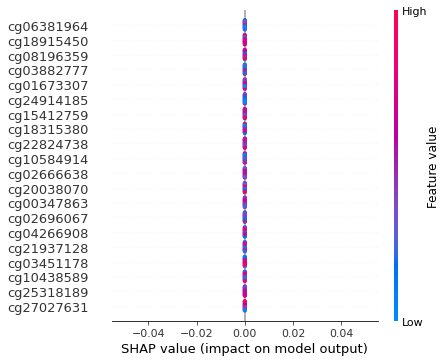

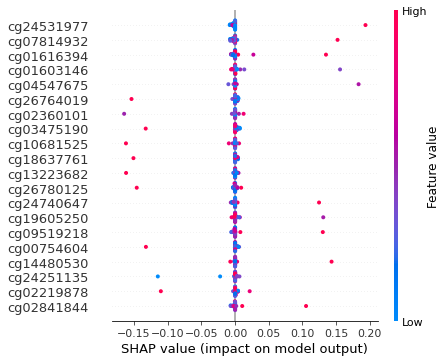

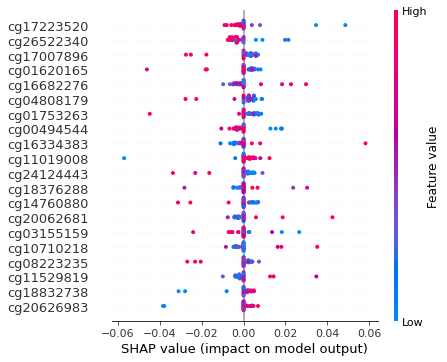

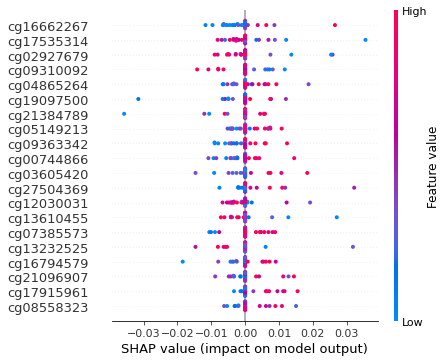

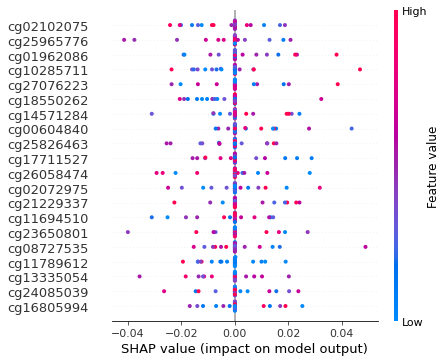

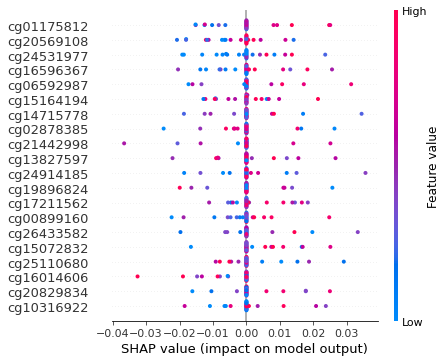

In [35]:
X = methylation_frame[correlation_frame.index]
y = indicator_classes

model = MLPClassifier(max_iter = 500)
params = {'model__hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100, )],
          'model__activation': ['tanh', 'relu'],
          'model__solver': ['sgd', 'adam'],
          'model__alpha': [0.0001, 0.001, 0.05],
          'model__learning_rate': ['constant','adaptive']}

pipeline = Pipeline([('standard_scaler', StandardScaler(with_mean=False)), ('model', model)])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 111, stratify = y)

result = []
for k in range (0, 6):
    grid_cv = GridSearchCV(estimator = pipeline, param_grid = params, scoring = 'accuracy', cv = 5, n_jobs = -1)
    grid_cv.fit(X_train.values, np.ravel(y_train, order = 'C'))
    #grid_cv.fit(X_train, y_train)

    explainer = shap.KernelExplainer(grid_cv.predict, X)
    shap_values = explainer.shap_values(X)    
    indicator_folder_SHAP = '{0}/SHAP_{1}'.format(indicator_folder, k)
    if not os.path.isdir(indicator_folder_SHAP):
            os.mkdir(indicator_folder_SHAP)
    
    x, y = 15, 12
    fig_inch = (x/2.54, y/2.54)
    fig = plt.figure()
    shap.summary_plot(shap_values, features = X, feature_names = X.columns, show = False)
    plt.gcf().set_size_inches(fig_inch)
    fig.patch.set_facecolor('white')
    fig.savefig('{0}/beeswarm_{1}.png'.format(indicator_folder_SHAP, k), format = 'png', dpi = 300, bbox_inches = 'tight')
    
    vals = np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns, vals)),columns = ['col_name', 'feature_importance_vals'])
    feature_importance.sort_values(by = ['feature_importance_vals'], ascending = False, inplace = True)
    result.append(list(feature_importance['col_name'])[0:30])

In [38]:
general_cpgs = list(set(result[0]) & set(result[1]) & set(result[2]) & set(result[3]) &
                    set(result[4]) & set(result[5]))
print(len(general_cpgs))

0
